# Drought Prediction using Deep Learning

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Here the required input data is imported in the form of a csv file. the file contains monthly SPI(Standardised Precipitation Index) from 1901 to till date. 

In [43]:
df = pd.read_csv('SPI3.csv')
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

,spi1,spi2,Unnamed: 3
Date,,,
1901-01-01,1,54,NaN
1901-02-01,0,71,NaN
1901-03-01,0,29,NaN
1901-04-01,0,77,NaN
1901-05-01,0,36,NaN


In [53]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

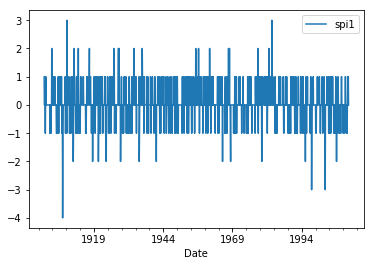

In [83]:
data = df_idx[['spi1']]
data.plot(y='spi1')



# Normalising the Dataset

In [189]:
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1901 to %d"%(1980 + int(0.3*years)))

Total data: 109 years
80 percent data = 1901 to 2012


## Spliting of data into training and testing sets 

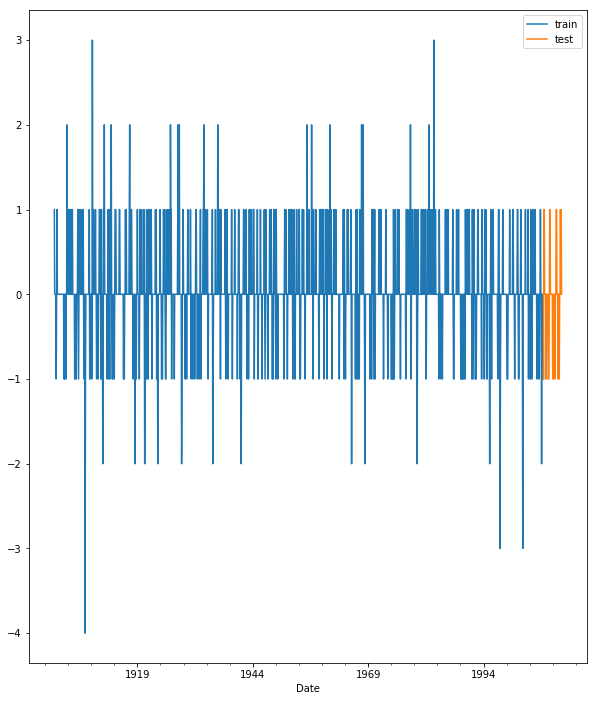

In [117]:
split_date = pd.Timestamp('01-01-2007')


train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [118]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [119]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

C:\Users\chatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\chatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\chatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\chatt\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [120]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (1272 x 1)
Test size: (47 x 1)


In [ ]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

# Building a neural network

In [132]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

# 1 Hidden layer with 1 Neuron

In [135]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1272/1272 [==============================] - 0s 116us/step - loss: 0.0122
Epoch 2/20
1272/1272 [==============================] - 0s 42us/step - loss: 0.0114
Epoch 3/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0113
Epoch 4/20
1272/1272 [==============================] - 0s 49us/step - loss: 0.0111
Epoch 5/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0111
Epoch 6/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0110
Epoch 7/20
1272/1272 [==============================] - 0s 49us/step - loss: 0.0109
Epoch 8/20
1272/1272 [==============================] - 0s 67us/step - loss: 0.0108
Epoch 9/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0107
Epoch 10/20
1272/1272 [==============================] - 0s 49us/step - loss: 0.0106
Epoch 11/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0105
Epoch 12/20
1272/1272 [==============================] - 0s 54us/step - l

R-Squared: 0.001654


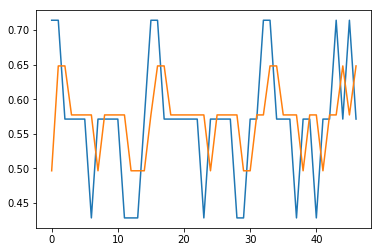

In [136]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

# Hidden Layers with 50 neurons each and ReLU activation function
 

In [148]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1272/1272 [==============================] - 0s 187us/step - loss: 0.0538
Epoch 2/20
1272/1272 [==============================] - 0s 49us/step - loss: 0.0129
Epoch 3/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0124
Epoch 4/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0116
Epoch 5/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0108
Epoch 6/20
1272/1272 [==============================] - 0s 49us/step - loss: 0.0099
Epoch 7/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0094
Epoch 8/20
1272/1272 [==============================] - 0s 67us/step - loss: 0.0094
Epoch 9/20
1272/1272 [==============================] - 0s 67us/step - loss: 0.0084
Epoch 10/20
1272/1272 [==============================] - 0s 49us/step - loss: 0.0087
Epoch 11/20
1272/1272 [==============================] - 0s 54us/step - loss: 0.0085
Epoch 12/20
1272/1272 [==============================] - 0s 54us/step - l

R-Squared: -0.034006


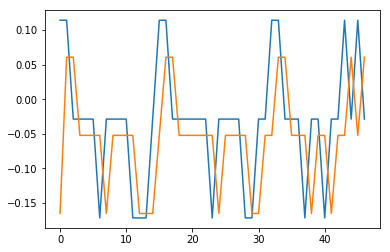

In [186]:
y_pred = model.predict(X_test)
plt.plot(y_test-0.6)
plt.plot((y_pred-0.6)*8)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))